Training:
1. Run Import Lib
2. Run Load and Preprocess Data

In [ ]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.5
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.6.0
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record                     0.5.1
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.15.0
backcall                         0.2.0
beautifulsoup4                   4.12.3


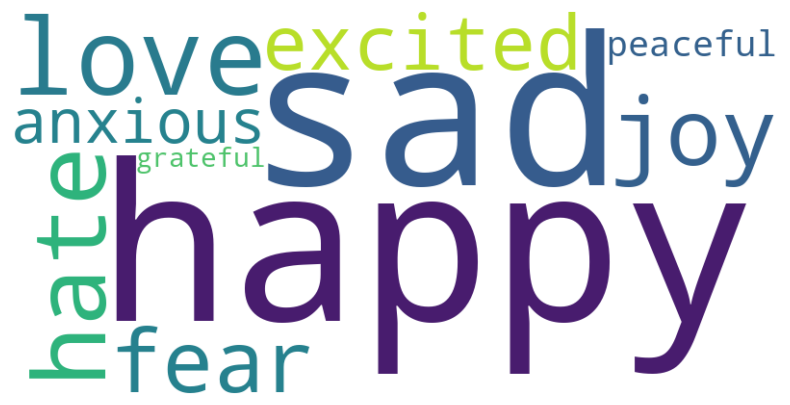

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Tần suất từ
word_frequencies = {
    'happy': 100,
    'sad': 90,
    'love': 80,
    'hate': 70,
    'joy': 60,
    'fear': 50,
    'excited': 40,
    'anxious': 30,
    'peaceful': 20,
    'grateful': 10
    # Thêm các từ và tần suất của chúng ở đây
}


# Tạo đám mây từ
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_frequencies)

# Hiển thị đám mây từ
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


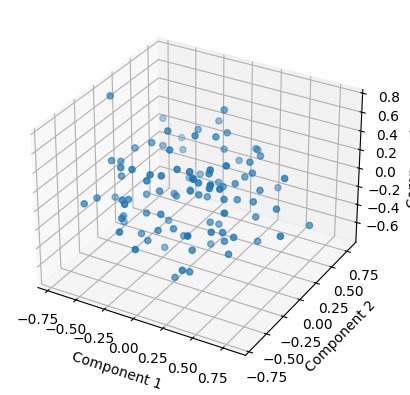

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Dữ liệu đầu vào - mỗi từ có vector đặc trưng là 10 phần tử
word_vectors = np.random.rand(100, 10)  # Đây là một ví dụ, bạn cần thay thế bằng dữ liệu thực tế của bạn

# Áp dụng PCA để giảm chiều thành 3 phần tử
pca = PCA(n_components=3)
word_vectors_reduced = pca.fit_transform(word_vectors)

# Trực quan hoá dạng 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Lấy các thành phần riêng lẻ của word_vectors_reduced để truyền vào scatter
x = word_vectors_reduced[:, 0]
y = word_vectors_reduced[:, 1]
z = word_vectors_reduced[:, 2]

# Trực quan hoá dạng 3D
ax.scatter(x, y, z)

# Đặt nhãn cho các trục
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')

# Hiển thị biểu đồ
plt.show()


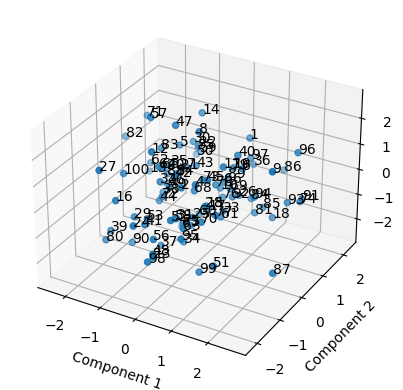

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Dữ liệu đầu vào - mỗi từ có vector đặc trưng là 10 phần tử
word_vectors = np.random.rand(100, 768)  # Đây là một ví dụ, bạn cần thay thế bằng dữ liệu thực tế của bạn

# Áp dụng PCA để giảm chiều thành 3 phần tử
pca = PCA(n_components=3)
word_vectors_reduced = pca.fit_transform(word_vectors)

# Tạo một danh sách các nhãn từ 1 đến 100
labels = [str(i) for i in range(1, 101)]

# Trực quan hoá dạng 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Lấy các thành phần riêng lẻ của word_vectors_reduced để truyền vào scatter
x = word_vectors_reduced[:, 0]
y = word_vectors_reduced[:, 1]
z = word_vectors_reduced[:, 2]

# Trực quan hoá dữ liệu 3D
scatter = ax.scatter(x, y, z)

# Đặt nhãn cho từng điểm
for i, txt in enumerate(labels):
    ax.text(x[i], y[i], z[i], txt)

# Đặt nhãn cho các trục
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')

# Hiển thị biểu đồ
plt.show()


## **Import Lib**



In [1]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.5
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.7.0
anyio                            3.7.1
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record                     0.5.1
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.15.0
backcall                         0.2.0
beautifulsoup4                   4.12.3
bidict                           0.23.1

In [2]:
%%capture
!pip install datasets

In [3]:
import os
import ast
import json
import pickle
import pandas as pd
from datasets import load_dataset
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
from transformers import AutoTokenizer, BertTokenizer, BertModel, AdamW, get_linear_schedule_with_warmup
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os
os.chdir("/content/drive/MyDrive/2_PBL7/")

## **Init**

In [ ]:
dataset_names = ['inspec', 'se-2010', 'se-2017', 'kp20k']

## **Load Data**

- input: abstract
- label: danh sách các keyword

Nguồn data:
- Inspec: https://huggingface.co/datasets/midas/inspec?row=0
- SE-2010: https://huggingface.co/datasets/taln-ls2n/semeval-2010-pre?row=0
- SE-2017: https://huggingface.co/datasets/midas/semeval2017

Hoặc sử dụng kp20k: gồm 530809 rows dữ liệu

### KP20K

In [ ]:
# !unzip "./Phraserformer/data.zip" -d "./Phraserformer"

In [ ]:
# Đường dẫn tới thư mục chứa các file JSON
folder_path = "./Phraserformer/data/dataset/kp20k"

# Khởi tạo một danh sách để lưu trữ dữ liệu từ các file JSON
data_list = []

# Lặp qua tất cả các file trong thư mục
for filename in os.listdir(folder_path):
    # Kiểm tra nếu file có đuôi là ".json"
    if filename.endswith(".json"):
        # Đường dẫn đến file JSON
        file_path = os.path.join(folder_path, filename)
        # Mở file và load nội dung
        with open(file_path, "r") as file:
            # Thêm dữ liệu từ file vào danh sách
            data_list.extend([json.loads(line) for line in file])

In [ ]:
print(len(data_list))

In [ ]:
print(data_list[0:10])

In [ ]:
# Creating DataFrame from list of dictionaries
kp20k_df = pd.DataFrame(data_list)

In [ ]:
kp20k_df['keyword'] = kp20k_df['keyword'].apply(lambda x: x.split(";"))

In [ ]:
# Displaying the DataFrame
kp20k_df.head(5)

### Inspec

In [ ]:
inspec_ds = load_dataset("midas/inspec")

In [ ]:
print(inspec_ds)

In [ ]:
train_inspec_df = pd.DataFrame(inspec_ds['train'])
validation_inspec_df = pd.DataFrame(inspec_ds['validation'])
test_inspec_df = pd.DataFrame(inspec_ds['test'])

In [ ]:
all_inspec_df = pd.concat([train_inspec_df, validation_inspec_df, test_inspec_df], ignore_index=True)

In [ ]:
print(all_inspec_df)

In [ ]:
def keyword_list(x):
  keywords = set()
  i = 0
  while i<len(x['doc_bio_tags']):
    if x['doc_bio_tags'][i]=='B':
      keyword = [x['document'][i]]
      while (i+1<len(x['doc_bio_tags']) and x['doc_bio_tags'][i+1]=='I'):
        keyword.append(x['document'][i+1])
        i+=1
      keyword = ' '.join(keyword)
      keywords.add(keyword)
    i+=1
  return list(keywords)
keyword_list(all_inspec_df.loc[0])

In [ ]:
# Tạo dataframe mới
inspec_df = pd.DataFrame()

# Cột abstract là ghép các phần tử trong document thành chuỗi
inspec_df['abstract'] = all_inspec_df['document'].apply(' '.join)

# Cột keyword lấy các từ có doc_bio_tags = 'B'
inspec_df['keyword'] = all_inspec_df.apply(lambda x: keyword_list(x), axis=1)



In [ ]:
print(inspec_df.iloc[0]['abstract'])
print(inspec_df.iloc[0]['keyword'])

In [ ]:
inspec_df.head(5)

### SE-2010

In [ ]:
se2010_ds = load_dataset("taln-ls2n/semeval-2010-pre")

In [ ]:
print(se2010_ds)

In [ ]:
train_se2010_df = pd.DataFrame(se2010_ds['train'])
test_se2010_df = pd.DataFrame(se2010_ds['test'])

In [ ]:
all_se2010_df = pd.concat([train_se2010_df, test_se2010_df], ignore_index=True)

In [ ]:
all_se2010_df.head(5)

In [ ]:
se2010_df = all_se2010_df[['title', 'abstract', 'keyphrases']]

In [ ]:
se2010_df = se2010_df.rename(columns={'keyphrases': 'keyword'})

In [ ]:
se2010_df.head(5)

In [ ]:
print(se2010_df.iloc[0]['title'])
print(se2010_df.iloc[0]['abstract'])
print(se2010_df.iloc[0]['keyword'])

### SE-2017

In [ ]:
se2017_ds = load_dataset("midas/semeval2017")

In [ ]:
print(se2017_ds)

In [ ]:
train_se2017_df = pd.DataFrame(se2017_ds['train'])
validation_se2017_df = pd.DataFrame(se2017_ds['validation'])
test_se2017_df = pd.DataFrame(se2017_ds['test'])

In [ ]:
all_se2017_df = pd.concat([train_se2017_df, validation_se2017_df, test_se2017_df], ignore_index=True)

In [ ]:
all_se2017_df.head(5)

In [ ]:
# Tạo dataframe mới
se2017_df = pd.DataFrame()

# Cột abstract là ghép các phần tử trong document thành chuỗi
se2017_df['abstract'] = all_se2017_df['document'].apply(' '.join)

# Cột keyword lấy các từ có doc_bio_tags = 'B'
se2017_df['keyword'] = all_se2017_df.apply(lambda x: keyword_list(x), axis=1)

In [ ]:
se2017_df.head(5)

In [ ]:
print(se2017_df.iloc[0]['abstract'])
print(se2017_df.iloc[0]['keyword'])

### Full Data

In [ ]:
se2017_df.columns

In [ ]:
# dataset_names
cols = list(se2017_df.columns)
print(cols)

In [ ]:
# kp20k_df_cols = kp20k_df[cols]
inspec_df_cols = inspec_df[cols]
se2010_df_cols = se2010_df[cols]
se2017_df_cols = se2017_df[cols]

In [ ]:
merged_df = pd.concat([inspec_df_cols, se2010_df_cols, se2017_df_cols], ignore_index=True)

In [ ]:
merged_df.head(5)

In [ ]:
len(merged_df)

In [ ]:
print(merged_df.iloc[0]['abstract'])
print(merged_df.iloc[0]['keyword'])

## Prepare Data

### Main

*Nên hay không nên bỏ title vào abstract*

In [ ]:
bert_model_name = "google-bert/bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(bert_model_name)

In [ ]:
merged_df.iloc[0]['abstract']

In [ ]:
# encoding = tokenizer(merged_df.iloc[0]['abstract'], return_tensors='pt')
# decoding = [tokenizer.decode(idx) for idx in encoding['input_ids'][0]]
# print(decoding[1:-1])
# print(len(decoding[1:-1]))

In [ ]:
def generate_BIO_labels(abstract_tokens, keyword_tokens):
    # print("abstract_tokens", abstract_tokens)
    # print("keyword_tokens", keyword_tokens)
    BIO_labels = []

    # Tạo một danh sách các từ khóa mở đầu từ danh sách keyword_tokens
    start_keywords = [token[0] for token in keyword_tokens]
    # print(start_keywords)


    # Duyệt qua từng từ trong abstract_tokens
    idx_token = 0
    while idx_token<len(abstract_tokens):
        token = abstract_tokens[idx_token]
        # print(1)
        # print("token", token)
        # kiểm tra token có phải là token mở đầu không
        if token in start_keywords:
          # print(2)
          # tìm các vị trí trong keyword list bắt đầu bằng token trên
          # print("start_keywords", start_keywords)
          idx_keywords =[i for i, keyword in enumerate(start_keywords) if keyword==token]
          # print("idx_keywords",idx_keywords)
          # nếu không có keyword nào match thì sẽ gán cho token đó nhãn O
          correct = 0
          # với mỗi vị trí trong danh sách vị trí đã tìm được ở trên
          for idx_keyword in idx_keywords:
            # print(3)
            # lấy keyword match với index đã tìm thấy
            keyword_match = keyword_tokens[idx_keyword]
            # khởi tạo các biến vị trí của keyword_match và abstract_tokens đang xét
            k = 1
            new_idx = idx_token + 1
            if len(keyword_match) == 1 or len(abstract_tokens)==new_idx:
              BIO_labels.append('B')
              # print(BIO_labels)
              correct = 1
              break
            # print(len(abstract_tokens))
            # print(new_idx)
            # print(len(keyword_match))
            # print(k)
            # print(abstract_tokens[new_idx])
            # print(keyword_match[k])
            while abstract_tokens[new_idx]==keyword_match[k]:
              k+=1
              new_idx+=1
              if (k==len(keyword_match) or new_idx==len(abstract_tokens)):
                # print(4)
                BIO_labels.append('B')
                BIO_labels.extend(['I']*(k-1))
                idx_token += k-1
                # print(BIO_labels)
                correct = 1
                break
            else:
              BIO_labels.append('O')
              # print(BIO_labels)
              correct = 1
              break
            if correct==1:
              # print(5)
              # print('correct')
              break
        else:
            BIO_labels.append('O')
            # print(BIO_labels)
        idx_token += 1
        # print(BIO_labels)
        # print(len(BIO_labels))
        # print(idx_token)

    return BIO_labels

# Input
# abstract_token = ['selective', 'representing', 'and', 'world', 'making', 'we', 'discuss', 'the', 'thesis', 'of', 'selective', 'representing', 'the', 'idea', 'that', 'the', 'contents', 'of', 'the', 'mental', 'representations', 'had', 'by', 'organisms', 'are', 'highly', 'constrained', 'by', 'the', 'biological', 'niches', 'within', 'which', 'the', 'organisms', 'evolved', '.', 'while', 'such', 'a', 'thesis', 'has', 'been', 'defended', 'by', 'several', 'authors', 'elsewhere', ',', 'our', 'primary', 'concern', 'here', 'is', 'to', 'take', 'up', 'the', 'issue', 'of', 'the', 'compatibility', 'of', 'selective', 'representing', 'and', 'realism', '.', 'we', 'hope', 'to', 'show', 'three', 'things', '.', 'first', ',', 'that', 'the', 'notion', 'of', 'selective', 'representing', 'is', 'fully', 'consistent', 'with', 'the', 'realist', 'idea', 'of', 'a', 'mind', 'independent', 'world', '.', 'second', ',', 'that', 'not', 'only', 'are', 'these', 'two', 'consistent', ',', 'but', 'that', 'the', 'latter', 'lrb', 'the', 'realist', 'conception', 'of', 'a', 'mind', 'independent', 'world', 'rrb', 'provides', 'the', 'most', 'powerful', 'perspective', 'from', 'which', 'to', 'motivate', 'and', 'understand', 'the', 'differing', 'perceptual', 'and', 'cognitive', 'profiles', 'themselves', '.', 'third', ',', 'that', 'the', 'lrb', 'genuine', 'and', 'important', 'rrb', 'sense', 'in', 'which', 'organism', 'and', 'environment', 'may', 'together', 'constitute', 'an', 'integrated', 'system', 'of', 'scientific', 'interest', 'poses', 'no', 'additional', 'threat', 'to', 'the', 'realist', 'conception']
# keyword_tokens = [['mental', 'representations'], ['selective', 'representing'], ['selective', 'representing'], ['organisms'], ['cognitive', 'profiles'], ['realism']]

# abstract_token = ['temp', 'it', 'chief', 'rallies', 'troops', 'lsb', 'mori', 'rsb', 'the', 'appointment', 'of', 'a', 'highly', 'qualified', 'interim', 'it', 'manager', 'enabled', 'market', 'research', 'company', 'mori', 'to', 'rapidly', 'restructure', 'its', 'it', 'department', '.', 'now', 'the', 'resulting', 'improvements', 'are', 'allowing', 'it', 'to', 'support', 'an', 'increasing', 'role', 'for', 'technology', 'in', 'the', 'assimilation', 'and', 'analysis', 'of', 'market', 'research']
# keyword_tokens = [['mori'], ['interim', 'it', 'manager'], ['market', 'research', 'company']]
# Tạo BIO labels
# BIO_labels = generate_BIO_labels(abstract_token, keyword_tokens)

# In kết quả
# print(BIO_labels)

### Cur

In [ ]:
def token_process(token):
  if (token[-1]=='.' and len(token)!=1 and '.' not in token[:-1]):
    # print('after', [token[:-1], '.'])
    return token_process(token[:-1])+['.']
  elif token[-1] in [',', ':', '!', '?', ';', '"', "'", ')', ']', '}'] and token[0] in ["'", '"', '(', '[', '{'] and len(token)>2:
    # print('after', [token[0], token[1:-1], token[-1]])
    return [token[0], token[1:-1], token[-1]]
  elif token[-1] in [',', ':', '!', '?', ';', '"', "'", ')', ']', '}'] and len(token)!=1:
    # print('after', [token[:-1], token[-1]])
    return [token[:-1], token[-1]]
  elif token[0] in ["'", '"', '(', '[', '{'] and len(token)!=1:
    # print('after', [token[0], token[1:]])
    return [token[0], token[1:]]
  return [token]


def mySplit(text):
  # chia text thành danh sách các từ bằng dấu cách ' '
  text = text.lower()
  text = text.replace('-', ' ')
  tokens = text.split(' ')
  # loại bỏ các token rỗng và strip token
  tokens = [token.strip() for token in tokens if token!=""]
  # nếu từ đó kết thúc bằng dấu chấm '.' và bên trong từ đó không còn dấu chấm nào thì sẽ tách ra thành 2 từ đó và dấu chấm
  dot_tokens = []
  for token in tokens:
    # print('before', token)
    # print(token_process(token))
    dot_tokens.extend(token_process(token))
  return dot_tokens

def tokenizerSplit(text):
  encoding = tokenizer(text, return_tensors='pt')
  decoding = [tokenizer.decode(idx) for idx in encoding['input_ids'][0]]
  return decoding[1:-1]

def convInputOutput(abstract, keyword):
  # # chia abstract thành danh sách các từ bằng dấu cách ' '
  # abstract = abstract.replace('-', ' ')
  # tokens = abstract.split(' ')
  # # loại bỏ các token rỗng và strip token
  # tokens = [token.strip() for token in tokens if token!=""]
  # # nếu từ đó kết thúc bằng dấu chấm '.' và bên trong từ đó không còn dấu chấm nào thì sẽ tách ra thành 2 từ đó và dấu chấm
  # dot_tokens = []
  # for token in tokens:
  #   # print('before', token)
  #   # print(token_process(token))
  #   dot_tokens.extend(token_process(token))

  abstract_tokens = tokenizerSplit(abstract)
  keyword_tokens = [tokenizerSplit(keyword_iter) for keyword_iter in keyword]
  BIO_labels = generate_BIO_labels(abstract_tokens, keyword_tokens)
  return abstract_tokens, BIO_labels

kq1 = list(convInputOutput(merged_df.iloc[0]['abstract'], merged_df.iloc[0]['keyword']))
print(len(kq1[0]), len(kq1[1]))
kq2 = list(convInputOutput(merged_df.iloc[1]['abstract'], merged_df.iloc[1]['keyword']))
print(len(kq2[0]), len(kq2[1]))

In [ ]:
merged_df.iloc[0]['abstract']

Từ df có 2 cột là abstract (abstract của bài báo KH) và keyword (danh sách các keyword nằm trong bài báo đó).

Chuyển thành df mới có 2 cột lần lượt là input (từng chữ trong abstract sau khi được tách riêng ra bằng dấu cách hoặc dấu chấm) và output (ứng với mỗi từ trong abstract đó sẽ có một nhãn thuộc BIO).

In [ ]:
merged_df

In [ ]:
# def new_function(a, b):
#   print(a)
#   print(b)
#   return a, b

In [ ]:
merged_df['Abstract_inputs'] = merged_df.apply(lambda row: convInputOutput(row['abstract'], row['keyword'])[0], axis=1)
merged_df['BIO_labels'] = merged_df.apply(lambda row: convInputOutput(row['abstract'], row['keyword'])[1], axis=1)

In [ ]:
final_df = merged_df[['abstract', 'Abstract_inputs', 'BIO_labels']]

In [ ]:
final_df

In [ ]:
final_df.to_csv('SaveData/final_df.csv', index=False)

### Nháp

In [ ]:
# import nltk
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize

# # Download stopwords list (only need to do this once)
# nltk.download('stopwords')
# nltk.download('punkt')

# # Sample text
# text = "This paper proposes using virtual reality to enhance the perception of actions by distant users on a shared application. Here, distance may refer either to space ( e.g. in a remote synchronous collaboration) or time ( e.g. during playback of recorded actions). Our approach consists in immersing the application in a virtual inhabited 3D space and mimicking user actions by animating avatars. We illustrate this approach with two applications, the one for remote collaboration on a shared application and the other to playback recorded sequences of user actions. We suggest this could be a low cost enhancement for telepresence."

# # Tokenize the text
# words = word_tokenize(text)

# # Remove stopwords
# stop_words = set(stopwords.words('english'))
# filtered_words = [word for word in words if word.lower() not in stop_words]

# # Join the words back into a single string
# filtered_text = ' '.join(filtered_words)

# print(filtered_text)

## Load and Preprocess Data

In [ ]:
final_df = pd.read_csv('SaveData/final_df.csv')

In [ ]:
final_df.head(5)

,abstract,Abstract_inputs,BIO_labels
0,A conflict between language and atomistic info...,"['a', 'conflict', 'between', 'language', 'and'...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
1,Selective representing and world-making We dis...,"['selective', 'representing', 'and', 'world', ...","['B', 'I', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
2,Does classicism explain universality ? Argumen...,"['does', 'classic', '##ism', 'explain', 'unive...","['O', 'B', 'I', 'O', 'O', 'O', 'O', 'O', 'O', ..."
3,Separate accounts go mainstream -LSB- investme...,"['separate', 'accounts', 'go', 'mainstream', '...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B', ..."
4,Evolving receptive-field controllers for mobil...,"['evolving', 'rec', '##eptive', '-', 'field', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'B', 'I', ..."


In [ ]:
def load_imdb_data(data_file):
    df = pd.read_csv(data_file)
    abstracts = df['abstract'].tolist()
    texts = df['Abstract_inputs'].apply(lambda x: ast.literal_eval(x)).tolist()
    labels = df['BIO_labels'].apply(lambda x: ast.literal_eval(x)).tolist()
    return abstracts, texts, labels

In [ ]:
data_file = 'SaveData/final_df.csv'
abstracts, texts, labels = load_imdb_data(data_file)

In [ ]:
print(len(abstracts))
print(len(texts))
print(len(labels))

2744
2744
2744


In [ ]:
print(abstracts[0:10])
print(texts[0:10])
print(labels[0:10])

["A conflict between language and atomistic information Fred Dretske and Jerry Fodor are responsible for popularizing three well-known theses in contemporary philosophy of mind : the thesis of Information-Based Semantics -LRB- IBS -RRB- , the thesis of Content Atomism -LRB- Atomism -RRB- and the thesis of the Language of Thought -LRB- LOT -RRB- . LOT concerns the semantically relevant structure of representations involved in cognitive states such as beliefs and desires . It maintains that all such representations must have syntactic structures mirroring the structure of their contents . IBS is a thesis about the nature of the relations that connect cognitive representations and their parts to their contents -LRB- semantic relations -RRB- . It holds that these relations supervene solely on relations of the kind that support information content , perhaps with some help from logical principles of combination . Atomism is a thesis about the nature of the content of simple symbols . It hold

In [ ]:
print(len(abstracts[0]))
print(len(texts[0]))
print(len(labels[0]))

1289
265
265


In [ ]:
import numpy as np
label_to_index = {'O': 0, 'B': 1, 'I': 2, 'P': 3}
def one_hot_labels(labels):
  one_hot_labels = np.zeros((len(labels), len(label_to_index)), dtype=int)
  for i, label in enumerate(labels):
      one_hot_labels[i, label_to_index[label]] = 1
  return one_hot_labels
print(one_hot_labels(['O', 'O', 'O', 'B', 'I', 'I', 'O']))

[[1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 1 0]
 [1 0 0 0]]


In [ ]:
labels = [one_hot_labels(label) for label in labels]

In [ ]:
print(len(texts[0]))
print(len(labels[0]))

265
265


In [ ]:
for i in range(len(texts)):
  if len(texts[i])!=len(labels[i]):
    print(i)
    break

In [ ]:
# encoding = tokenizer(' '.join(texts[0]), return_tensors='pt', max_length=max_length, padding='max_length', truncation=True)

In [ ]:
# print(encoding)

In [ ]:
class TextClassificationDataset(Dataset):
    def __init__(self, abstracts, texts, labels, tokenizer, max_length):
        self.abstracts = abstracts
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length
    def __len__(self):
        return len(self.texts)
    def __getitem__(self, idx):
        abstract = self.abstracts[idx]
        text = self.texts[idx]
        label = self.labels[idx]
        # print('label before', label)
        # label = np.concatenate((label, np.array(['D'] * (512-len(label)))))
        # print('label after', label)
        encoding = self.tokenizer(abstract, return_tensors='pt', max_length=self.max_length, padding='max_length', truncation=True)
        # decoding = [self.tokenizer.decode(idx) for idx in encoding['input_ids'][0]]
        return {'abstract': abstract, 'abstract_tokens': text, 'input_ids': encoding['input_ids'].flatten(), 'attention_mask': encoding['attention_mask'].flatten(), 'BIO_labels': torch.tensor(label)}
        # return {'abstract_tokens': encoding['input_ids'][0], 'BIO_labels': label}

## Model

### BERT Model

In [ ]:
# input: abstract dạng mảng các phần tử là các token
# output: semantic embedding của từng phần tử trong abstract
# yêu cầu: độ dài của mảng các embedding bằng với độ dài của mảng các token.

In [ ]:
class BERTEncoder(nn.Module):
  def __init__(self, bert_model_name):
    super(BERTEncoder, self).__init__()
    self.tokenizer = AutoTokenizer.from_pretrained(bert_model_name)
    self.bert = BertModel.from_pretrained(bert_model_name)
    for param in self.bert.parameters():
      param.requires_grad = False

  def forward(self, input_ids, attention_mask):
    # abstract_tokens = [tokenizer.decode(idx) for idx in abstract_tokens]
    # abstracts = " ".join(abstract_tokens)
    # inputs = self.tokenizer(abstracts, return_tensors="pt")
    outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
    # inputs = self.tokenizer("Hello world!", return_tensors="pt").to('cuda')
    # output_test = self.bert(**inputs)
    # print(output_test.last_hidden_state)
    return outputs.last_hidden_state[0]

  def one_embed(self, input_ids, attention_mask):
    outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
    return outputs.pooler_output

  def get_output_shape(self):
    return self.bert.config.hidden_size

### Model Feed Forward

In [ ]:
# class BERTClassifier(nn.Module):
#     def __init__(self, bert_model_name, num_classes):
#         super(BERTClassifier, self).__init__()
#         self.bert = BertModel.from_pretrained(bert_model_name)
#         self.dropout = nn.Dropout(0.1)
#         self.fc = nn.Linear(self.bert.config.hidden_size, num_classes)

#     def forward(self, input_ids, attention_mask):
#         outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
#         pooled_output = outputs.pooler_output
#         x = self.dropout(pooled_output)
#         logits = self.fc(x)
#         return logits

In [ ]:
class FFClassifier(nn.Module):
    # input_shape: bert output shape, num_classes = 3 (BIO)
    def __init__(self, input_shape, hidden_size, num_classes):
        super(FFClassifier, self).__init__()
        self.fc1 = nn.Linear(input_shape, hidden_size)
        self.fc2 = nn.Linear(hidden_size, num_classes)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, token_embeds):
        # print(type(token_embeds))
        x = torch.relu(self.fc1(token_embeds))
        x = self.fc2(x)
        x = self.softmax(x)
        return x

### Phraseformer Model

In [ ]:
# import pickle

# with open('combined_vectors_600.pkl', 'rb') as f:
#     combined_vectors = pickle.load(f)

# count = 0
# for key, value in combined_vectors.items():
#     print(key, value)
#     count += 1
#     print(len(value))
#     if count >= 10:
#       break

In [ ]:
# input: abstract_tokens là mảng các token của abstract
# output: label của từng token là mảng BIO_labels có độ dài bằng với mảng abstract_tokens

In [ ]:
class Phraseformer(nn.Module):
  def __init__(self, bert_model_name, is_train_bert, is_graph_embedding, len_graph_embedding, path_graph_embedding):
    super(Phraseformer, self).__init__()
    # self.bert_model_name = bert_model_name
    self.bertEmbed = BERTEncoder(bert_model_name)
    self.len_graph_embedding = len_graph_embedding
    if is_train_bert:
      print("Có transfer learning bert")
    if is_graph_embedding:
      print("Có kết hợp graph embedding")
    self.ffclassifier = FFClassifier(self.bertEmbed.get_output_shape() + len_graph_embedding, 256, 3)

    # load graph_embedding
    with open(path_graph_embedding, 'rb') as f:
      self.combined_vectors = pickle.load(f)

    self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

  def forward(self, abstract_tokens, input_ids, attention_mask):
    bertEmbedding = self.bertEmbed(input_ids, attention_mask)
    # print("bertEmbedding.shape", bertEmbedding.shape)
    graphEmbedding = torch.tensor([self.combined_vectors[abstract_token] if abstract_token in self.combined_vectors else [0]*self.len_graph_embedding for abstract_token in abstract_tokens])
    add_padding = torch.tensor([[-100]*self.len_graph_embedding]*(512 - graphEmbedding.shape[0]))
    # print("add_padding.shape", add_padding.shape)
    # print("graphEmbedding.shape", graphEmbedding.shape)
    graphEmbedding_pad = torch.cat((graphEmbedding, add_padding), dim=0).to(self.device)
    # print("graphEmbedding_pad.shape", graphEmbedding_pad.shape)
    full_embedding = torch.cat((bertEmbedding, graphEmbedding_pad), dim=1).to(torch.float32)
    # print(full_embedding.dtype)
    labels = self.ffclassifier(full_embedding)
    return labels

  def get_embedding(self, abstract_tokens, input_ids, attention_mask):
    bertEmbedding = self.bertEmbed.one_embed(input_ids, attention_mask)
    return bertEmbedding

## Training

### Initialize

In [ ]:
# init hyperparameter of model
is_train_bert = True
is_graph_embedding = True
len_graph_embedding = 600
path_graph_embedding = "combined_vectors_600_th3_1e5_full.pkl"
bert_model_name = "google-bert/bert-base-uncased"
max_length = 512
hidden_size = 256
num_classes = 3
batch_size = 1
num_epochs = 4
learning_rate = 2e-5

#### Cur

In [ ]:
def train(model, data_loader, optimizer, scheduler, device):
    model.train()
    # print(0)
    for batch in data_loader:
        # print(1.1)
        optimizer.zero_grad()
        abstract_tokens = batch['abstract_tokens']
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['BIO_labels'].to(device)
        # print(len(abstract_tokens))
        # print(len(input_ids[0]))
        # print(input_ids[0])
        # print(len(attention_mask[0]))
        # print(attention_mask[0])
        # print(len(labels[0]))
        # print(2)
        outputs = model(abstract_tokens=abstract_tokens, input_ids=input_ids, attention_mask=attention_mask)
        # print(3)
        # print('outputs', outputs)
        # print(len(outputs))
        labels = labels.float()
        # print('labels', labels)
        # print(len(labels[0]))
        labels = labels.view(-1, labels.size(-1)).argmax(dim=1)
        # print('after labels', labels)
        outputs_split = outputs[1:len(labels)+1]

        # old loss
        # loss = nn.CrossEntropyLoss()(outputs_split, labels)
        class_weights = torch.tensor([1, 5, 5], device=device, dtype=torch.float)
        loss_fn = nn.CrossEntropyLoss(weight=class_weights)
        loss = loss_fn(outputs_split, labels)
        # print(loss)

        # new loss
        # Tạo mask cho các vị trí trong labels bằng 0 và không phải 0
        # mask_zero = (labels == 0).float()
        # mask_non_zero = (labels != 0).float()

        # Tính toán loss cho các vị trí labels bằng 0
        # loss_fn = nn.CrossEntropyLoss(reduction='mean')
        # loss1 = loss_fn(outputs_split * mask_zero.unsqueeze(1), torch.zeros_like(labels, dtype=torch.long))
        # print("loss1:", outputs_split * mask_zero.unsqueeze(1))
        # print("loss1:", torch.zeros_like(labels, dtype=torch.long))
        # # Tính toán loss cho các vị trí labels khác 0
        # loss2 = loss_fn(outputs_split * mask_non_zero.unsqueeze(1), labels)
        # print("loss2:", outputs_split * mask_non_zero.unsqueeze(1))
        # print("loss2:", labels)

        # print("Loss1:", loss1)
        # print("Loss2:", loss2)

        # loss = loss1*0.01 + loss2*0.99

        # loss = nn.CrossEntropyLoss()(outputs[:len(labels[0])], labels[0].float())
        # print(4)
        loss.backward()
        optimizer.step()
        scheduler.step()

In [ ]:
# import torch
# import torch.nn as nn

# # Đầu ra dự đoán của mô hình
# outputs = torch.tensor([[0.9924, 0.0044, 0.0032],
#                         [0.9934, 0.0038, 0.0028],
#                         [0.9936, 0.0036, 0.0028]])
# #### eval
# _, preds = torch.max(outputs, dim=1)
# print(preds)
# # # Nhãn được biểu diễn dưới dạng one-hot encoding
# # labels = torch.tensor([[[1, 0, 0],
# #                         [1, 0, 0],
# #                         [0, 1, 0]]], dtype=torch.float32)

# # # Định dạng lại nhãn để phù hợp với đầu ra
# # labels = labels.view(-1, labels.size(-1)).argmax(dim=1)
# # print(labels)
# # # Tính toán hàm mất mát
# # loss_fn = nn.CrossEntropyLoss()
# # loss = loss_fn(outputs, labels)

# # print(loss)


In [ ]:
def evaluate(model, data_loader, device):
    model.eval()
    predictions = []
    actual_labels = []
    with torch.no_grad():
        for batch in data_loader:
            abstract_tokens = batch['abstract_tokens']
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['BIO_labels'].to(device)
            outputs = model(abstract_tokens=abstract_tokens, input_ids=input_ids, attention_mask=attention_mask)
            labels = labels.float()
            labels = labels.view(-1, labels.size(-1)).argmax(dim=1)
            outputs = outputs[1:len(labels)+1]
            _, preds = torch.max(outputs, dim=1)
            predictions.extend(preds.cpu().tolist())
            actual_labels.extend(labels.cpu().tolist())
    return accuracy_score(actual_labels, predictions), classification_report(actual_labels, predictions)

In [ ]:
# max_length_abs = 512
# Loại bỏ các mảng dữ liệu có len(texts) >= 510
abstracts_filtered = []
texts_filtered = []
labels_filtered = []

for abstract, text, label in zip(abstracts, texts, labels):
    if len(text) < 510:  # Chỉ giữ lại các mảng có độ dài nhỏ hơn 510
        abstracts_filtered.append(abstract)
        texts_filtered.append(text)
        labels_filtered.append(label)

In [ ]:
print(len(texts_filtered))

2739


In [ ]:
# train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, test_size=0.2, random_state=42)

combined_data = list(zip(abstracts_filtered, texts_filtered))
# Chia dữ liệu kết hợp thành tập huấn luyện và tập kiểm tra
train_data, val_data, train_labels, val_labels = train_test_split(combined_data, labels_filtered, test_size=0.2, random_state=42)
# Tách dữ liệu của "abstracts" và "texts" sau khi chia
train_abstracts, train_texts = zip(*train_data)
val_abstracts, val_texts = zip(*val_data)

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(bert_model_name)
train_dataset = TextClassificationDataset(train_abstracts, train_texts, train_labels, tokenizer, max_length)
val_dataset = TextClassificationDataset(val_abstracts, val_texts, val_labels, tokenizer, max_length)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
model = Phraseformer(bert_model_name, is_train_bert, is_graph_embedding, len_graph_embedding, path_graph_embedding).to(device)

cuda


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Có transfer learning bert
Có kết hợp graph embedding


In [ ]:
optimizer = AdamW(model.parameters(), lr=learning_rate)
total_steps = len(train_dataloader) * num_epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:588: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


#### Cur

In [ ]:
for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")
    train(model, train_dataloader, optimizer, scheduler, device)
    accuracy, report = evaluate(model, val_dataloader, device)
    print(f"Validation Accuracy: {accuracy:.4f}")
    print(report)

Epoch 1/4
Validation Accuracy: 0.7917
              precision    recall  f1-score   support

           0       0.96      0.81      0.88     85102
           1       0.32      0.60      0.42      4599
           2       0.36      0.72      0.48      8907

    accuracy                           0.79     98608
   macro avg       0.54      0.71      0.59     98608
weighted avg       0.87      0.79      0.82     98608

Epoch 2/4
Validation Accuracy: 0.7999
              precision    recall  f1-score   support

           0       0.96      0.82      0.88     85102
           1       0.33      0.66      0.44      4599
           2       0.38      0.73      0.50      8907

    accuracy                           0.80     98608
   macro avg       0.56      0.73      0.61     98608
weighted avg       0.88      0.80      0.83     98608

Epoch 3/4
Validation Accuracy: 0.7976
              precision    recall  f1-score   support

           0       0.96      0.81      0.88     85102
           1   

### Save Model

In [ ]:
model_path = "./SaveModel/NO_BERT_WVFT_256_155_600_full.pth"

In [ ]:
torch.save(model.state_dict(), model_path)

### Load Model

In [ ]:
model.load_state_dict(torch.load(model_path, map_location=torch.device(device)))

<All keys matched successfully>

## Inference

Validation

In [ ]:
def extract_keywords_id(abstract_tokens, preds):
    keywords = []
    current_keyword = []
    for token, pred in zip(abstract_tokens, preds):
        if pred == 1:  # Nhãn thể hiện token bắt đầu một keyword
            if current_keyword != []:
                keywords.append(current_keyword)
            current_keyword = [token]  # Token đầu tiên của keyword
        elif pred == 2:  # Nhãn thể hiện token bên trong keyword
            current_keyword.append(token)  # Thêm token vào keyword
    if current_keyword != []:
        keywords.append(current_keyword)
    list_keyword = []
    for one_keyword in keywords:
        decoded_sequence = tokenizer.decode(one_keyword)
        list_keyword.append(decoded_sequence)
    return list_keyword

In [ ]:
def extract_keywords(abstract_tokens, preds):
    keywords = []
    current_keyword = ""
    for token, pred in zip(abstract_tokens, preds):
        if pred == 1:  # Nhãn thể hiện token bắt đầu một keyword
            if current_keyword != "":
                keywords.append(current_keyword)
            current_keyword = token[0]  # Token đầu tiên của keyword
        elif pred == 2:  # Nhãn thể hiện token bên trong keyword
            current_keyword += " " + token[0]  # Thêm token vào keyword
    if current_keyword != "":
        keywords.append(current_keyword)
    return keywords

# Sử dụng hàm extract_keywords
abstract_tokens = [('learning',), ('non',), ('##re',), ('##gul',), ('##ar',), ('languages',), (':',), ('a',), ('comparison',), ('of',), ('simple',), ('rec',), ('##urrent',), ('networks',), ('and',), ('l',), ('##st',), ('##m',), ('rodriguez',), ('-',), ('l',), ('##rb',), ('-',), ('2001',), ('-',), ('rr',), ('##b',), ('-',), ('examined',), ('the',), ('learning',), ('ability',), ('of',), ('simple',), ('rec',), ('##urrent',), ('nets',), ('-',), ('l',), ('##rb',), ('-',), ('sr',), ('##ns',), ('-',), ('rr',), ('##b',), ('-',), ('-',), ('l',), ('##rb',), ('-',), ('elm',), ('##an',), (',',), ('1990',), ('-',), ('rr',), ('##b',), ('-',), ('on',), ('simple',), ('context',), ('-',), ('sensitive',), ('and',), ('context',), ('-',), ('free',), ('languages',), ('.',), ('in',), ('response',), ('to',), ('rodriguez',), ("'",), ('s',), ('-',), ('l',), ('##rb',), ('-',), ('2001',), ('-',), ('rr',), ('##b',), ('-',), ('article',), (',',), ('we',), ('compare',), ('the',), ('performance',), ('of',), ('simple',), ('rec',), ('##urrent',), ('nets',), ('and',), ('long',), ('short',), ('-',), ('term',), ('memory',), ('rec',), ('##urrent',), ('nets',), ('on',), ('context',), ('-',), ('free',), ('and',), ('context',), ('-',), ('sensitive',), ('languages',)]
preds = torch.tensor([1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 1, 2, 2, 2, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 0, 1, 0, 2, 2, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2,
        0, 1, 1, 0, 2, 1, 2, 2, 2, 0, 1, 0, 2, 0, 1, 0, 2, 2]).tolist()

keywords = extract_keywords(abstract_tokens, preds)
print(keywords)


['learning', 'non ##re ##gul ##ar languages', 'simple rec ##urrent networks', 'l ##st ##m', 'learning ability', 'simple rec ##urrent nets ##rb ##ns', 'elm ##an', 'simple', 'context sensitive', 'context free languages', 'rodriguez ##rb', 'simple rec ##urrent nets', 'long', 'short term', 'memory rec ##urrent nets', 'context free', 'context sensitive languages']


In [ ]:
def evaluate_batch(model, batch, device):
    with torch.no_grad():
        abstract_tokens = batch['abstract_tokens']
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['BIO_labels'].to(device)
        print(len(abstract_tokens))
        print(input_ids.shape)
        print(len(attention_mask[0]))
        outputs = model(abstract_tokens=abstract_tokens, input_ids=input_ids, attention_mask=attention_mask)
        labels = labels.float()
        labels = labels.view(-1, labels.size(-1)).argmax(dim=1)
        outputs = outputs[1:len(labels)+1]
        _, preds = torch.max(outputs, dim=1)
        # print(abstract_tokens)
        # print(input_ids)
        # print(input_ids[0][1:len(labels)+1])
        # print(preds)
        # print(labels)
        predict_keyword = extract_keywords(abstract_tokens, preds)
        labels_keyword = extract_keywords(abstract_tokens, labels)
        # print(predict_keyword)
        # print(labels_keyword)
        preds_Id = extract_keywords_id(input_ids[0][1:len(labels)+1], preds)
        labels_Id = extract_keywords_id(input_ids[0][1:len(labels)+1], labels)
        unique_preds_Id = list(set(preds_Id))
        # print(preds_Id)
        # print(labels_Id)
    return unique_preds_Id, labels_Id

In [ ]:
val_iterator = iter(val_dataloader)
batch = next(val_iterator)
print(batch['abstract_tokens'])
preds_Id, labels_Id = evaluate_batch(model, batch, device)
print(preds_Id)
print(labels_Id)

batch = next(val_iterator)
print(batch['abstract_tokens'])
preds_Id, labels_Id = evaluate_batch(model, batch, device)
print(preds_Id)
print(labels_Id)

batch = next(val_iterator)
print(batch['abstract_tokens'])
preds_Id, labels_Id = evaluate_batch(model, batch, device)
print(preds_Id)
print(labels_Id)

[('learning',), ('non',), ('##re',), ('##gul',), ('##ar',), ('languages',), (':',), ('a',), ('comparison',), ('of',), ('simple',), ('rec',), ('##urrent',), ('networks',), ('and',), ('l',), ('##st',), ('##m',), ('rodriguez',), ('-',), ('l',), ('##rb',), ('-',), ('2001',), ('-',), ('rr',), ('##b',), ('-',), ('examined',), ('the',), ('learning',), ('ability',), ('of',), ('simple',), ('rec',), ('##urrent',), ('nets',), ('-',), ('l',), ('##rb',), ('-',), ('sr',), ('##ns',), ('-',), ('rr',), ('##b',), ('-',), ('-',), ('l',), ('##rb',), ('-',), ('elm',), ('##an',), (',',), ('1990',), ('-',), ('rr',), ('##b',), ('-',), ('on',), ('simple',), ('context',), ('-',), ('sensitive',), ('and',), ('context',), ('-',), ('free',), ('languages',), ('.',), ('in',), ('response',), ('to',), ('rodriguez',), ("'",), ('s',), ('-',), ('l',), ('##rb',), ('-',), ('2001',), ('-',), ('rr',), ('##b',), ('-',), ('article',), (',',), ('we',), ('compare',), ('the',), ('performance',), ('of',), ('simple',), ('rec',), ('#

In [ ]:
batch = next(val_iterator)
print(batch['abstract_tokens'])
preds_Id, labels_Id = evaluate_batch(model, batch, device)
print(preds_Id)
print(labels_Id)

[('module',), ('placement',), ('with',), ('boundary',), ('constraints',), ('using',), ('b',), ('*',), ('-',), ('trees',), ('the',), ('module',), ('placement',), ('problem',), ('is',), ('to',), ('determine',), ('the',), ('co',), ('-',), ('or',), ('##dina',), ('##tes',), ('of',), ('logic',), ('modules',), ('in',), ('a',), ('chip',), ('such',), ('that',), ('no',), ('two',), ('modules',), ('overlap',), ('and',), ('some',), ('cost',), ('-',), ('l',), ('##rb',), ('-',), ('e',), ('.',), ('g',), ('.',), ('silicon',), ('area',), (',',), ('inter',), ('##con',), ('##ne',), ('##ction',), ('length',), (',',), ('etc',), ('.',), ('-',), ('rr',), ('##b',), ('-',), ('is',), ('opt',), ('##imi',), ('##sed',), ('.',), ('to',), ('short',), ('##en',), ('connections',), ('between',), ('inputs',), ('and',), ('outputs',), ('and',), ('/',), ('or',), ('make',), ('related',), ('modules',), ('adjacent',), (',',), ('it',), ('is',), ('desired',), ('to',), ('place',), ('some',), ('modules',), ('along',), ('the',), ('

In [ ]:
# tokenizer = AutoTokenizer.from_pretrained(bert_model_name)

In [ ]:
# abs = final_df.iloc[1]['abstract']

## Evaluate

In [ ]:
def F1_score(preds_Id, labels_Id):
    # Sắp xếp danh sách từ khóa theo độ dài giảm dần
    preds_Id.sort(key=len, reverse=True)

    # Danh sách để giữ các từ khóa cuối cùng
    filtered_preds_Id = []

    # Kiểm tra và loại bỏ các từ khóa nằm trong từ khóa khác
    for i, keyword in enumerate(preds_Id):
        if not any(keyword in k for k in preds_Id[:i]):
            filtered_preds_Id.append(keyword)

    print(filtered_preds_Id)
    preds_Id = filtered_preds_Id

    TP = len(set(preds_Id) & set(labels_Id))
    FP = len(set(preds_Id) - set(labels_Id))
    FN = len(set(labels_Id) - set(preds_Id))

    try:
        P = TP / (TP + FP)
        R = TP / (TP + FN)
    except:
        # F1 = None
        return None

    if (P!=0 and R!=0):
        F1 = 2 * (P * R) / (P + R)
    else:
        F1 = None
    return F1

In [ ]:
# preds_Id = ['even', 'unimodular', 'gaussian lattices', 'unimodular', 'gaussian lattices', 'unimodular integral lattices', 'gaussian integers classification', 'automorphisms', 'tau automorphism groups', 'niemeier lattices', 'unimodular', 'real', 'integral lattices', 'even', 'unimodular gaussian lattices', 'equivalence']
# labels_Id = ['even unimodular integral lattices', 'gaussian integers', 'automorphisms', 'niemeier lattices']
# preds_Id = ['unimodular', 'gaussian lattices', 'unimodular', 'gaussian lattices', 'unimodular integral lattices', 'gaussian integers', 'automorphisms', 'automorphism groups', 'niemeier lattices', 'unimodular', 'real', 'integral lattices', 'unimodular', 'gaussian lattices']
# labels_Id = ['even unimodular integral lattices', 'gaussian integers', 'automorphisms', 'niemeier lattices']
preds_Id = ['unimodular gaussian lattices', 'tau', 'gaussian integers', 'automorphisms', 'gaussian lattices', 'unimodular', 'automorphism groups', 'real integral lattices', 'unimodular integral lattices', 'niemeier lattices']
labels_Id = ['even unimodular integral lattices', 'gaussian integers', 'automorphisms', 'niemeier lattices']
print("F1: ", F1_score(preds_Id, labels_Id))

['unimodular gaussian lattices', 'unimodular integral lattices', 'real integral lattices', 'automorphism groups', 'gaussian integers', 'niemeier lattices', 'automorphisms', 'tau']
F1:  0.5


In [ ]:
def F1_batch(model, batch, device):
    with torch.no_grad():
        abstract_tokens = batch['abstract_tokens']
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['BIO_labels'].to(device)
        outputs = model(abstract_tokens=abstract_tokens, input_ids=input_ids, attention_mask=attention_mask)
        labels = labels.float()
        labels = labels.view(-1, labels.size(-1)).argmax(dim=1)
        outputs = outputs[1:len(labels)+1]
        _, preds = torch.max(outputs, dim=1)
        # print(abstract_tokens)
        # print(input_ids)
        # print(input_ids[0][1:len(labels)+1])
        # print(preds)
        # print(labels)
        predict_keyword = extract_keywords(abstract_tokens, preds)
        labels_keyword = extract_keywords(abstract_tokens, labels)
        # print(predict_keyword)
        # print(labels_keyword)
        preds_Id = extract_keywords_id(input_ids[0][1:len(labels)+1], preds)
        labels_Id = extract_keywords_id(input_ids[0][1:len(labels)+1], labels)
        # print(preds_Id)
        # print(labels_Id)
    return F1_score(preds_Id, labels_Id)

In [ ]:
print(len(val_dataloader))
F1_list = []
for batch in val_dataloader:
    F1 = F1_batch(model, batch, device)
    if (F1!=None):
        F1_list.append(F1)

548


In [ ]:
print(F1_list)

[0.22222222222222224, 0.1111111111111111, 0.46153846153846156, 0.28571428571428575, 0.30303030303030304, 0.25, 0.08, 0.39999999999999997, 0.1739130434782609, 0.125, 0.09999999999999999, 0.4, 0.14285714285714288, 0.13333333333333333, 0.4, 0.13333333333333333, 0.3333333333333333, 0.11111111111111112, 0.35294117647058826, 0.3157894736842105, 0.4571428571428572, 0.19047619047619047, 0.16666666666666669, 0.10526315789473685, 0.11764705882352942, 0.5, 0.2222222222222222, 0.3157894736842105, 0.16666666666666666, 0.07407407407407407, 0.21875, 0.19999999999999998, 0.08888888888888888, 0.33333333333333337, 0.36363636363636365, 0.3333333333333333, 0.16666666666666669, 0.163265306122449, 0.45454545454545453, 0.5, 0.2222222222222222, 0.09523809523809525, 0.09523809523809522, 0.33333333333333326, 0.4444444444444444, 0.42857142857142855, 0.13333333333333333, 0.5333333333333333, 0.5454545454545454, 0.25, 0.24242424242424246, 0.3076923076923077, 0.06666666666666667, 0.16666666666666666, 0.2, 0.22222222

In [ ]:
sum = 0
for F1 in F1_list:
  sum += F1
print(sum)
print(sum/len(F1_list))

127.75614756832749
0.2777307555833206


In [ ]:
accuracy, report = evaluate(model, val_dataloader, device)
print(f"Validation Accuracy: {accuracy:.4f}")
print(report)

Validation Accuracy: 0.7992
              precision    recall  f1-score   support

           0       0.96      0.81      0.88     85102
           1       0.34      0.70      0.46      4599
           2       0.38      0.75      0.50      8907

    accuracy                           0.80     98608
   macro avg       0.56      0.75      0.61     98608
weighted avg       0.88      0.80      0.83     98608



## Demo

In [ ]:
max_length = 512
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
bert_model_name = "google-bert/bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(bert_model_name)

def tokenizerSplit(text):
  encoding = tokenizer(text, return_tensors='pt')
  decoding = [tokenizer.decode(idx) for idx in encoding['input_ids'][0]]
  return decoding[1:-1]

# abstract = """A  bit  - serial  VLSI  neural  network  is  described  from  an  initial  architecture  for  a  synapse array through to silicon layout and board design.  The issues surrounding bit  - serial  computation,  and  analog/digital  arithmetic  are  discussed  and  the  parallel  development  of  a  hybrid  analog/digital  neural  network  is  outlined.  Learning  and  recall  capabilities  are  reported  for  the  bit  - serial  network  along  with  a  projected  specification  for  a  64  - neuron,  bit  - serial  board  operating  at 20 MHz.  This tech(cid:173) nique  is  extended  to  a  256  (2562  synapses)  network  with  an  update  time  of 3ms,  using  a  "paging"  technique  to  time  - multiplex  calculations  through  the  synapse  array."""
# abstract_tokens = tokenizerSplit(abstract)
# print(abstract_tokens)
# encoding = tokenizer(abstract, return_tensors='pt', max_length=max_length, padding='max_length', truncation=True)
# input_ids = encoding['input_ids'].to(device)
# attention_mask = encoding['attention_mask'].to(device)
# print(len(abstract_tokens))
# print(input_ids.shape)
# print(attention_mask.shape)
# outputs = model(abstract_tokens=abstract_tokens, input_ids=input_ids, attention_mask=attention_mask)
# outputs = outputs[1:len(abstract_tokens)+1]
# _, preds = torch.max(outputs, dim=1)
# preds_Id = extract_keywords_id(input_ids[0][1:len(abstract_tokens)+1], preds)
# unique_preds_Id = list(set(preds_Id))
# print(unique_preds_Id)

In [ ]:
def find_keyword(abstract):
    # abstract = """A  bit  - serial  VLSI  neural  network  is  described  from  an  initial  architecture  for  a  synapse array through to silicon layout and board design.  The issues surrounding bit  - serial  computation,  and  analog/digital  arithmetic  are  discussed  and  the  parallel  development  of  a  hybrid  analog/digital  neural  network  is  outlined.  Learning  and  recall  capabilities  are  reported  for  the  bit  - serial  network  along  with  a  projected  specification  for  a  64  - neuron,  bit  - serial  board  operating  at 20 MHz.  This tech(cid:173) nique  is  extended  to  a  256  (2562  synapses)  network  with  an  update  time  of 3ms,  using  a  "paging"  technique  to  time  - multiplex  calculations  through  the  synapse  array."""
    abstract_tokens = tokenizerSplit(abstract)
    print(len(abstract_tokens))
    if (len(abstract_tokens)>max_length-2):
        return []
    encoding = tokenizer(abstract, return_tensors='pt', max_length=max_length, padding='max_length', truncation=True)
    input_ids = encoding['input_ids'].to(device)
    attention_mask = encoding['attention_mask'].to(device)
    # print(len(abstract_tokens))
    # print(input_ids.shape)
    # print(attention_mask.shape)
    outputs = model(abstract_tokens=abstract_tokens, input_ids=input_ids, attention_mask=attention_mask)
    outputs = outputs[1:len(abstract_tokens)+1]
    _, preds = torch.max(outputs, dim=1)
    preds_Id = extract_keywords_id(input_ids[0][1:len(abstract_tokens)+1], preds)
    unique_preds_Id = list(set(preds_Id))
    # print(unique_preds_Id)
    return unique_preds_Id

In [ ]:
# # read file csv
# df_test = pd.read_csv('./CrawlData/papers_data.csv')

In [ ]:
# i = 1
# print(df_test.iloc[i]['Abstract'])
# print(find_keyword(df_test.iloc[i]['Abstract']))

In [ ]:
# len(df_test)

In [ ]:
# # Áp dụng hàm find_keyword cho mỗi hàng của DataFrame và tạo cột Keywords
# df_test['Keywords'] = df_test.apply(lambda x: find_keyword(x['Abstract']), axis=1)

# print(df_test)

In [ ]:
# # Lưu DataFrame df_test thành một file CSV mới
# df_test.to_csv('./CrawlData/papers_data_done.csv', index=False)

## Keyword liên quan

In [ ]:
file_path = "./CrawlData/papers_data_done.csv"
data = pd.read_csv(file_path)
print(data.head())

In [ ]:
keyword_col = data[['Keywords']]

In [ ]:
import ast
# Tạo một tập hợp để chứa tất cả các từ khóa
all_keywords = set()

# Lặp qua mỗi hàng dữ liệu trong cột 'Keywords'
for keywords_list in data['Keywords']:
    arr = ast.literal_eval(keywords_list)
    # Chuyển đổi mảng từ khóa thành tập hợp và thêm vào tập hợp chứa tất cả các từ khóa
    all_keywords.update(set(arr))

all_keywords_list = list(all_keywords)

# In ra một phần của danh sách (ví dụ: 100 phần tử đầu tiên)
print(all_keywords_list[:100])

In [ ]:
def one_embed(abstract):
    # abstract = """A  bit  - serial  VLSI  neural  network  is  described  from  an  initial  architecture  for  a  synapse array through to silicon layout and board design.  The issues surrounding bit  - serial  computation,  and  analog/digital  arithmetic  are  discussed  and  the  parallel  development  of  a  hybrid  analog/digital  neural  network  is  outlined.  Learning  and  recall  capabilities  are  reported  for  the  bit  - serial  network  along  with  a  projected  specification  for  a  64  - neuron,  bit  - serial  board  operating  at 20 MHz.  This tech(cid:173) nique  is  extended  to  a  256  (2562  synapses)  network  with  an  update  time  of 3ms,  using  a  "paging"  technique  to  time  - multiplex  calculations  through  the  synapse  array."""
    abstract_tokens = tokenizerSplit(abstract)
    # print(len(abstract_tokens))
    if (len(abstract_tokens)>max_length-2):
        return []
    encoding = tokenizer(abstract, return_tensors='pt', max_length=max_length, padding='max_length', truncation=True)
    input_ids = encoding['input_ids'].to(device)
    attention_mask = encoding['attention_mask'].to(device)
    # print(len(abstract_tokens))
    # print(input_ids.shape)
    # print(attention_mask.shape)
    outputs = model.get_embedding(abstract_tokens=abstract_tokens, input_ids=input_ids, attention_mask=attention_mask)
    return outputs

In [ ]:
import numpy as np

def euclidean_distance(a, b):
    return np.linalg.norm(a - b)

In [ ]:
remove_keyword = ['ne']

In [ ]:
# print(len(all_keywords_list))

In [ ]:
# one_emb_dict = {}
# for i in range(0, len(all_keywords_list), 1000):
#   if (i+1000<len(all_keywords_list)):
#     all_keywords_list_split = all_keywords_list[i:i+1000]
#   else:
#     all_keywords_list_split = all_keywords_list[i:-1]
#   # can remove keyword here
#   one_emb_dict_split = list(map(one_embed, all_keywords_list_split))
#   for j in range(len(one_emb_dict_split)):
#     one_emb_dict[all_keywords_list_split[j]] = one_emb_dict_split[j]
#   print(i)

# print(len(one_emb_dict))

In [ ]:
# one_emb_arr = list(map(one_embed, all_keywords_list))

In [ ]:
# # Lưu từ điển vào file pickle
# with open("./SaveEmbedding/one_emb_arr.pkl", "wb") as f:
#     pickle.dump(one_emb_dict, f)

In [ ]:
import pickle

# Đọc từ điển từ file pickle
with open("./SaveEmbedding/one_emb_arr.pkl", "rb") as f:
    one_emb_dict = pickle.load(f)

# Kiểm tra độ dài của từ điển
print(len(one_emb_dict))

191301


In [ ]:
# Giả sử từ điển có cấu trúc như {'key': tensor} và tensor có thể chuyển đổi thành list
# Chuyển đổi dictionary thành danh sách để lưu vào file CSV
import csv
import torch
csv_data = []

for key, value in one_emb_dict.items():
    # Nếu giá trị là tensor, chuyển đổi nó thành list
    if isinstance(value, torch.Tensor):
        value = value.tolist()
    # Thêm key và value vào danh sách csv_data
    csv_data.append([key] + value)

# Lưu vào file .csv
with open("output.csv", "w", newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    # Ghi tiêu đề nếu cần (ví dụ: ['Key', 'Value1', 'Value2', ...])
    # csvwriter.writerow(['Key'] + ['Value' + str(i) for i in range(len(csv_data[0]) - 1)])
    # Ghi dữ liệu
    csvwriter.writerows(csv_data)

In [ ]:
# cccccccccccccc
import torch
import csv
import ast

# Đọc từ file CSV và chuyển đổi lại thành dictionary
reconstructed_dict = {}

with open("output.csv", "r") as csvfile:
    csvreader = csv.reader(csvfile)
    for row in csvreader:
        key = row[0]
        # print(row[1:][0])
        # Chuyển đổi giá trị từ danh sách sang tensor
        row_data = ast.literal_eval(row[1:][0])
        values = list(map(float, row_data))  # Assuming the values were floats
        reconstructed_dict[key] = torch.tensor(values)

# Kiểm tra độ dài của từ điển được tái tạo
print(len(reconstructed_dict))

# # Optional: Lưu lại vào file pickle để đảm bảo tính toàn vẹn của dữ liệu
# with open("reconstructed_one_emb_arr.pkl", "wb") as f:
#     pickle.dump(reconstructed_dict, f)

191301


In [ ]:
emb1 = one_embed('entropy connectivity')
emb2 = one_embed('boolean functions connectivity')
emb3 = one_embed('network')
emb4 = one_embed('nand gates')

In [ ]:
import numpy as np

def cosine_similarity(a, b):
    dot_product = np.dot(a, b)
    norm_a = np.linalg.norm(a)
    norm_b = np.linalg.norm(b)
    similarity = dot_product / (norm_a * norm_b)
    return similarity

In [ ]:
# Calculate cosine similarity
similarity = cosine_similarity(emb1[0].cpu(), emb2[0].cpu())
print("Cosine Similarity:", similarity)
# Calculate cosine similarity
similarity = cosine_similarity(emb1[0].cpu(), emb3[0].cpu())
print("Cosine Similarity:", similarity)
# Calculate cosine similarity
similarity = cosine_similarity(emb1[0].cpu(), emb4[0].cpu())
print("Cosine Similarity:", similarity)
# Calculate cosine similarity
similarity = cosine_similarity(emb2[0].cpu(), emb3[0].cpu())
print("Cosine Similarity:", similarity)

Cosine Similarity: 0.9774023
Cosine Similarity: 0.93177825
Cosine Similarity: 0.96761686
Cosine Similarity: 0.95404637


In [ ]:
similarity = euclidean_distance(reconstructed_dict['cnn'].cpu(), reconstructed_dict['cnn'].cpu())

In [ ]:
print(similarity)

0.0


In [ ]:
# Calculate euclidean_distance
similarity = euclidean_distance(emb1[0].cpu(), emb2[0].cpu())
print("euclidean_distance:", similarity)
# Calculate euclidean_distance
similarity = euclidean_distance(emb1[0].cpu(), emb3[0].cpu())
print("euclidean_distance:", similarity)
# Calculate euclidean_distance
similarity = euclidean_distance(emb1[0].cpu(), emb4[0].cpu())
print("euclidean_distance:", similarity)
# Calculate euclidean_distance
similarity = euclidean_distance(emb2[0].cpu(), emb3[0].cpu())
print("euclidean_distance:", similarity)

euclidean_distance: 3.5088348
euclidean_distance: 6.0273094
euclidean_distance: 4.3432384
euclidean_distance: 4.975414


## Full code test

In [ ]:
# import ast
# # Tạo một tập hợp để chứa tất cả các từ khóa
# all_keywords = set()

# # Lặp qua mỗi hàng dữ liệu trong cột 'Keywords'
# for keywords_list in data['Keywords']:
#     arr = ast.literal_eval(keywords_list)
#     # Chuyển đổi mảng từ khóa thành tập hợp và thêm vào tập hợp chứa tất cả các từ khóa
#     all_keywords.update(set(arr))

# all_keywords_list = list(all_keywords)

# # In ra một phần của danh sách (ví dụ: 100 phần tử đầu tiên)
# print(all_keywords_list[:100])

In [ ]:
# def one_embed(abstract):
#     # abstract = """A  bit  - serial  VLSI  neural  network  is  described  from  an  initial  architecture  for  a  synapse array through to silicon layout and board design.  The issues surrounding bit  - serial  computation,  and  analog/digital  arithmetic  are  discussed  and  the  parallel  development  of  a  hybrid  analog/digital  neural  network  is  outlined.  Learning  and  recall  capabilities  are  reported  for  the  bit  - serial  network  along  with  a  projected  specification  for  a  64  - neuron,  bit  - serial  board  operating  at 20 MHz.  This tech(cid:173) nique  is  extended  to  a  256  (2562  synapses)  network  with  an  update  time  of 3ms,  using  a  "paging"  technique  to  time  - multiplex  calculations  through  the  synapse  array."""
#     abstract_tokens = tokenizerSplit(abstract)
#     # print(len(abstract_tokens))
#     if (len(abstract_tokens)>max_length-2):
#         return []
#     encoding = tokenizer(abstract, return_tensors='pt', max_length=max_length, padding='max_length', truncation=True)
#     input_ids = encoding['input_ids'].to(device)
#     attention_mask = encoding['attention_mask'].to(device)
#     # print(len(abstract_tokens))
#     # print(input_ids.shape)
#     # print(attention_mask.shape)
#     outputs = model.get_embedding(abstract_tokens=abstract_tokens, input_ids=input_ids, attention_mask=attention_mask)
#     return outputs

In [ ]:
import numpy as np

def euclidean_distance(a, b):
    return np.linalg.norm(a - b)

In [ ]:
def distance_relevant(keyword, reconstructed_dict):
  embed_keyword = reconstructed_dict[keyword]
  distance_arrs = {}
  for key, value in reconstructed_dict.items():
    distance_arrs[key] = euclidean_distance(embed_keyword, value)
    # print(distance_arrs[key])
  sorted_dict = dict(sorted(distance_arrs.items(), key=lambda item: item[1]))
  # Lấy top 10 phần tử đầu tiên
  top_10 = dict(list(sorted_dict.items())[:10])

  print(top_10)

In [ ]:
# truyền vào một keyword muốn tìm 10 keyword liên quan nhất vd "cnn"
keyword = 'transformer'
distance_relevant(keyword, reconstructed_dict)

{'transformer': 0.0, 'vitae transformer': 1.8253893, 'adapter': 1.825814, '3dversarial generator': 1.8299772, 'quadattack': 1.8459946, 'retvecbedding model': 1.8595428, 'beamrecuionly': 1.8660902, 'eﬁnt algorithm': 1.8872267, 'noisy power methodm': 1.901356, 'collaborative transformer': 1.9122128}
